## Metallomics data dim reduction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import umap
import os
from sklearn.preprocessing import StandardScaler
import matplotlib.patches as patches
import matplotlib.transforms as transforms

sns.set(style='whitegrid', context='notebook', font='Arial')


/Users/aulakhs/anaconda3/envs/ML/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
output_dir = '/Users/aulakhs/Documents/RalserLab/metallica/experiment_data/metpert_WTmetallomics/output/plots/intracellular_metallomics'


In [3]:
colkey_BioSpecID = {
    'AllEle 1': "#EEE0E5",
    'Ca 0': "#BCD2EE",
    'Ca 0.01': "#A8C6E6",
    'Ca 0.02': "#94BBDF",
    'Ca 0.05': "#81B0D8",
    'Ca 0.1': "#6DA4D1",
    'Ca 0.2': "#5999C9",
    'Ca 0.5': "#468EC2",
    'Ca 2': "#3283BB",
    'Ca 5': "#1F78B4",
    'Cu 0': "#90EE90",
    'Cu 0.01': "#86E586",
    'Cu 0.02': "#7DDD7D",
    'Cu 0.05': "#74D574",
    'Cu 0.1': "#6BCD6B",
    'Cu 0.2': "#62C462",
    'Cu 0.5': "#59BC59",
    'Cu 2': "#4FB44F",
    'Cu 5': "#46AC46",
    'Cu 10': "#3DA33D",
    'Cu 20': "#349B34",
    'Cu 50': "#2B932B",
    'Cu 100': "#228B22",
    'Fe 0': "#F08080",
    'Fe 0.01': "#EA7777",
    'Fe 0.02': "#E56E6F",
    'Fe 0.05': "#E06567",
    'Fe 0.1': "#DA5D5F",
    'Fe 0.2': "#D55457",
    'Fe 0.5': "#D04B4F",
    'Fe 2': "#CA4247",
    'Fe 5': "#C53A3F",
    'Fe 10': "#C03137",
    'Fe 20': "#BA282F",
    'Fe 50': "#B51F27",
    'Fe 100': "#B0171F",
    'K 0.1': "#CDC9C9",
    'K 0.2': "#B6B3B3",
    'K 0.5': "#9F9D9D",
    'K 2': "#888686",
    'K 5': "#717171",
    'K 10': "#5B5B5B",
    'Mg 0.05': "#E3A869",
    'Mg 0.1': "#D89B5E",
    'Mg 0.2': "#CC8F53",
    'Mg 0.5': "#C28248",
    'Mg 2': "#B6763E",
    'Mg 5': "#AB6A33",
    'Mg 10': "#A15D28",
    'Mg 20': "#95511D",
    'Mg 50': "#8B4513",
    'Mn 0': "#FFE1FF",
    'Mn 0.01': "#F2D3F6",
    'Mn 0.02': "#E6C5EE",
    'Mn 0.05': "#D9B8E5",
    'Mn 0.1': "#CDAADD",
    'Mn 0.2': "#C09CD4",
    'Mn 0.5': "#B48FCC",
    'Mn 2': "#A881C4",
    'Mn 5': "#9B73BB",
    'Mn 10': "#8F66B3",
    'Mn 20': "#8258AA",
    'Mn 50': "#764AA2",
    'Mn 100': "#6A3D9A",
    'Mo 0': "#40E0D0",
    'Mo 0.01': "#3AD8C9",
    'Mo 0.02': "#35D0C2",
    'Mo 0.05': "#30C8BC",
    'Mo 0.1': "#2AC0B5",
    'Mo 0.2': "#25B8AE",
    'Mo 0.5': "#20B0A8",
    'Mo 2': "#1AA8A1",
    'Mo 5': "#15A09A",
    'Mo 10': "#109893",
    'Mo 20': "#0A908D",
    'Mo 50': "#058886",
    'Mo 100': "#008080",
    'Na 0': "#FFEC8B",
    'Na 0.01': "#FDE57F",
    'Na 0.02': "#FCDE73",
    'Na 0.05': "#FAD768",
    'Na 0.1': "#F9D05C",
    'Na 0.2': "#F7C951",
    'Na 0.5': "#F6C345",
    'Na 2': "#F5BC39",
    'Na 5': "#F3B52E",
    'Na 10': "#F2AE22",
    'Na 20': "#F0A717",
    'Na 50': "#EFA00B",
    'Na 100': "#EE9A00",
    'Zn 0': "#CAE1FF",
    'Zn 2e-04': "#BACFF5",
    'Zn 0.01': "#AABEEB",
    'Zn 0.02': "#9BADE1",
    'Zn 0.05': "#8B9BD7",
    'Zn 0.1': "#7C8ACE",
    'Zn 0.2': "#6C79C4",
    'Zn 0.5': "#5D67BA",
    'Zn 2': "#4D56B0",
    'Zn 5': "#3E45A7",
    'Zn 10': "#2E339D",
    'Zn 20': "#1F2293",
    'Zn 50': "#0F1189",
    'Zn 100': "#000080",
}

In [4]:
colkey_metpert = {
    "AllEle Control": "#EEE0E5",
    "Ca Depletion": "#A6CEE3",
    "Ca Excess": "#1F78B4",
    "Cu Depletion": "#B2DF8A",
    "Cu Excess": "#33A02C",
    "Fe Depletion": "#FB9A99",
    "Fe Excess": "#E31A1C",
    "K Depletion": "#C1CDC1",
    "K Excess": "#838B83",
    "Mg Depletion": "#FDBF6F",
    "Mg Excess": "#FF7F00",
    "Mn Depletion": "#CAB2D6",
    "Mn Excess": "#6A3D9A",
    "Mo Depletion": "#00C5CD",
    "Mo Excess": "#00868B",
    "Na Depletion": "#FFD700",
    "Na Excess": "#DAA520",
    "Zn Depletion": "#4876FF",
    "Zn Excess": "#000080"
}

In [5]:
common_metal_order = ['Ca 0', 'Ca 0.01', 'Ca 0.02', 'Ca 0.05', 'Ca 0.1', 'Ca 0.2', 'Ca 0.5', 'Ca 2', 'Cu 0', 'Cu 0.01', 'Cu 0.02', 'Cu 0.05', 'Cu 0.1', 'Cu 0.2', 'Cu 0.5', 'Cu 2', 'Cu 5', 'Cu 10', 'Cu 20', 'Fe 0', 'Fe 0.01', 'Fe 0.02', 'Fe 0.05', 'Fe 0.2', 'Fe 0.5', 'Fe 2', 'Fe 5', 'Fe 10', 'Fe 20', 'K 0.1', 'K 0.2', 'K 0.5', 'K 2', 'K 5', 'Mg 0.05', 'Mg 0.1', 'Mg 0.2', 'Mg 0.5', 'Mg 2', 'Mg 5', 'Mg 10', 'Mn 0', 'Mn 0.01', 'Mn 0.02', 'Mn 0.05', 'Mn 0.1', 'Mn 0.2', 'Mn 0.5', 'Mn 2', 'Mn 5', 'Mn 10', 'Mn 20', 'Mn 50', 'Mn 100', 'Mo 0', 'Mo 0.01', 'Mo 0.02', 'Mo 0.05', 'Mo 0.1', 'Mo 0.2', 'Mo 0.5', 'Na 0', 'Na 0.01', 'Na 0.02', 'Na 0.05', 'Na 0.1', 'Na 0.2', 'Na 0.5', 'Na 2', 'Na 5', 'Na 10', 'Na 20', 'Na 50', 'Na 100', 'Zn 0.01', 'Zn 0.02', 'Zn 0.05', 'Zn 0.1', 'Zn 0.2', 'Zn 0.5', 'Zn 2', 'Zn 5', 'Zn 10', 'Zn 20', 'Zn 50', 'Zn 100']

## frome proteome dataset

In [6]:
## read in data

all_metallomics_df = pd.read_csv("/Users/aulakhs/Documents/RalserLab/metallica/experiment_data/metpert_WTmetallomics/output/tables/metpertWTmetallomics_Pnorm_AEnorm.csv")
all_metallomics_df = all_metallomics_df[~all_metallomics_df['element_measured'].isin(['P', 'S'])]
all_metallomics_df

,element_measured,element_perturbed,rel_env_element_concentration_th,plate_position,SpecOD,ng_perwell_BC,BioSpecID,rel_env_element_concentration_actual,mean_ng_perwell_BC_AE,Percentage_Change_ngpwell,Ratio_to_AEngperwell
0,Ca,Fe,0.00,3 E4,0.577804,847.725974,Fe 0,0.118,990.792335,-0.144396,0.855604
1,Ca,Fe,0.50,2 D6,0.495047,928.567186,Fe 0.5,0.650,990.792335,-0.062803,0.937197
2,Ca,Mn,20.00,4 D3,0.434068,920.728469,Mn 20,19.935,990.792335,-0.070715,0.929285
3,Ca,Na,5.00,6 B5,0.650261,1031.108396,Na 5,4.414,990.792335,0.040691,1.040691
4,Ca,Na,0.05,6 F3,0.494811,1032.557888,Na 0.05,0.054,990.792335,0.042154,1.042154
...,...,...,...,...,...,...,...,...,...,...,...
1841,Zn,Na,0.20,6 D4,0.494281,303.970136,Na 0.2,0.182,308.677489,-0.015250,0.984750
1842,Zn,Ca,0.00,1 E4,0.343305,403.547469,Ca 0,0.002,308.677489,0.307343,1.307343
1843,Zn,Cu,0.02,2 C3,0.336360,303.508655,Cu 0.02,0.035,308.677489,-0.016745,0.983255
1844,Zn,Fe,0.50,3 F5,0.396986,312.531962,Fe 0.5,0.650,308.677489,0.012487,1.012487


In [7]:

# Select the relevant columns
selected_df = all_metallomics_df[['element_measured', 'BioSpecID', 'ng_perwell_BC']]

# Group by BioSpecID and element_measured, and calculate the mean
grouped_df = selected_df.groupby(['BioSpecID', 'element_measured']).mean().reset_index()

# Pivot the DataFrame to have BioSpecID as rows, element_measured as columns, and Ratio_to_AEngperwell as values
pivot_table = grouped_df.pivot(index='BioSpecID', columns='element_measured', values='ng_perwell_BC')

# Print the number of rows and columns in the final pivot table
num_rows = pivot_table.shape[0]
num_columns = pivot_table.shape[1]

print(f"Number of rows in the unfiltered pivot table: {num_rows}")
print(f"Number of columns in the unfiltered pivot table: {num_columns}")

# Count NAs in each column and row
na_count_col = pivot_table.isna().sum()
na_count_row = pivot_table.isna().sum(axis=1)

# Calculate the threshold for filtering (10% of total columns or rows)
threshold_col = 0.1 * len(pivot_table.columns)
threshold_row = 0.1 * len(pivot_table)

# Filter out columns and rows with more than 10% NAs
pivot_table = pivot_table.loc[:, na_count_col <= threshold_col]
pivot_table = pivot_table.loc[na_count_row <= threshold_row]

# Fill in remaining NAs with a value (e.g., 1)
pivot_table = pivot_table.fillna(1)

# Print the number of rows and columns in the final pivot table
num_rows = pivot_table.shape[0]
num_columns = pivot_table.shape[1]

print(f"Number of rows in the final pivot table: {num_rows}")
print(f"Number of columns in the final pivot table: {num_columns}")

Number of rows in the unfiltered pivot table: 89
Number of columns in the unfiltered pivot table: 8
Number of rows in the final pivot table: 89
Number of columns in the final pivot table: 6


## PCA of metallomics data

In [8]:

# Create a pivot table
metal_matrix = pivot_table

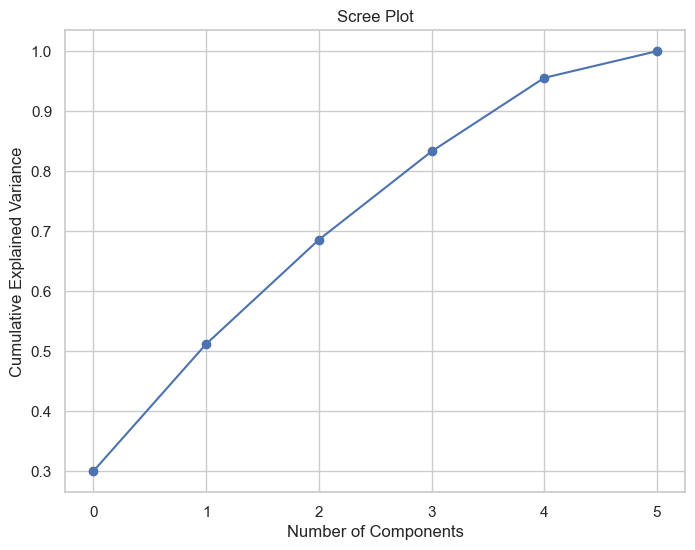

In [9]:
# Standardize (scale) the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(metal_matrix)

#Perform PCA analysis without specifying the number of components
pca = PCA()

# Transform the data
pca_result = pca.fit_transform(scaled_data)

# get variance explained 
explained_variance_ratio = pca.explained_variance_ratio_

# Create a scree plot
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(explained_variance_ratio), marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid(True)
plt.savefig('/Users/aulakhs/Documents/RalserLab/metallica/experiment_data/metpert_WTmetallomics/output/plots/intracellular_metallomics/PCA_metallome_allsamples_scree.pdf')
plt.show()

In [10]:
metal_matrix

element_measured,Ca,Fe,K,Mg,Mn,Zn
BioSpecID,,,,,,
Ca 0,64.633658,80.311827,41252.162699,8980.976107,27.091712,414.409937
Ca 0.01,161.393685,70.830131,45687.372846,9154.366435,20.721305,369.800217
Ca 0.02,217.756071,69.013373,47217.248095,9167.377545,19.392089,353.613582
Ca 0.05,314.811614,69.922061,49422.269671,9270.594288,18.160714,348.535072
Ca 0.1,416.505504,76.053531,50293.826505,9411.443472,17.097415,331.233202
...,...,...,...,...,...,...
Zn 0.5,1038.770467,64.689246,55192.336615,9336.445996,13.895969,179.888664
Zn 10,971.374183,73.667694,52879.226320,9667.295347,11.853253,955.864530
Zn 2,905.335413,89.473638,52935.982252,9807.499996,11.872289,568.850113


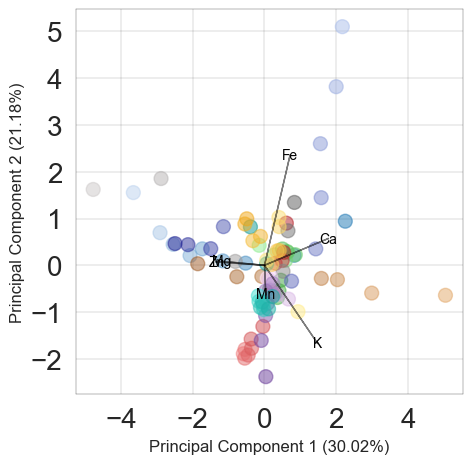

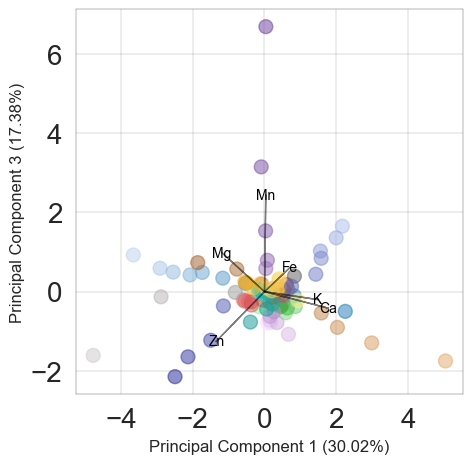

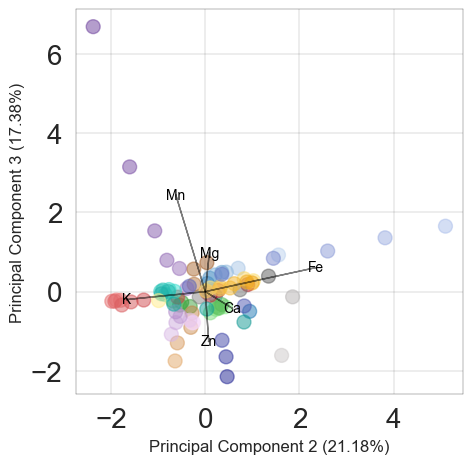

In [11]:
# Create a scatter plot with colors based on BioSpec IDs
colors = [colkey_BioSpecID.get(bs, 'gray') for bs in pivot_table.index]

def plot_pca_scatter(x, y, explained_variance_ratio, pca_result, colors, xlabel, ylabel, file_name):
    plt.figure(figsize=(5, 5))
    plt.scatter(pca_result[:, x], pca_result[:, y], c=colors, s=100, alpha=0.5)
    
    # Add arrows for loadings
    loadings = pca.components_.T
    for i, metal in enumerate(metal_matrix.columns):
        plt.arrow(0, 0, loadings[i, x]*3, loadings[i, y]*3,  # Adjust scaling factor if needed
                  color='black', alpha=0.5, head_width=0.02, head_length=0.02)
        plt.text(loadings[i, x]*3, loadings[i, y]*3, metal, color='black', ha='center', va='center', fontsize=10)

    plt.xlabel(f'Principal Component {x + 1} ({round(explained_variance_ratio[x] * 100, 2)}%)')
    plt.ylabel(f'Principal Component {y + 1} ({round(explained_variance_ratio[y] * 100, 2)}%)')

    # Customize the axis ticks
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    # Increase the linewidth of grid lines
    plt.grid(color="black", linewidth=0.1)

    # Customize the outer square
    plt.gca().spines['top'].set_linewidth(0.2)
    plt.gca().spines['right'].set_linewidth(0.2)
    plt.gca().spines['bottom'].set_linewidth(0.2)
    plt.gca().spines['left'].set_linewidth(0.2)
    for spine in plt.gca().spines.values():
        spine.set_edgecolor('black')

    plt.savefig(file_name)
    plt.show()

# Plot PC1 vs PC2
plot_pca_scatter(0, 1, explained_variance_ratio, pca_result, colors,
                 'Principal Component 1', 'Principal Component 2',
                 '/Users/aulakhs/Documents/RalserLab/metallica/experiment_data/metpert_WTmetallomics/output/plots/intracellular_metallomics/PCA_metallome_allsamples_pc1vspc2_with_arrows.pdf')

# Plot PC1 vs PC3
plot_pca_scatter(0, 2, explained_variance_ratio, pca_result, colors,
                 'Principal Component 1', 'Principal Component 3',
                 '/Users/aulakhs/Documents/RalserLab/metallica/experiment_data/metpert_WTmetallomics/output/plots/intracellular_metallomics/PCA_metallome_allsamples_pc1vspc3_with_arrows.pdf')

# Plot PC2 vs PC3
plot_pca_scatter(1, 2, explained_variance_ratio, pca_result, colors,
                 'Principal Component 2', 'Principal Component 3',
                 '/Users/aulakhs/Documents/RalserLab/metallica/experiment_data/metpert_WTmetallomics/output/plots/intracellular_metallomics/PCA_metallome_allsamples_pc2vspc3_with_arrows.pdf')

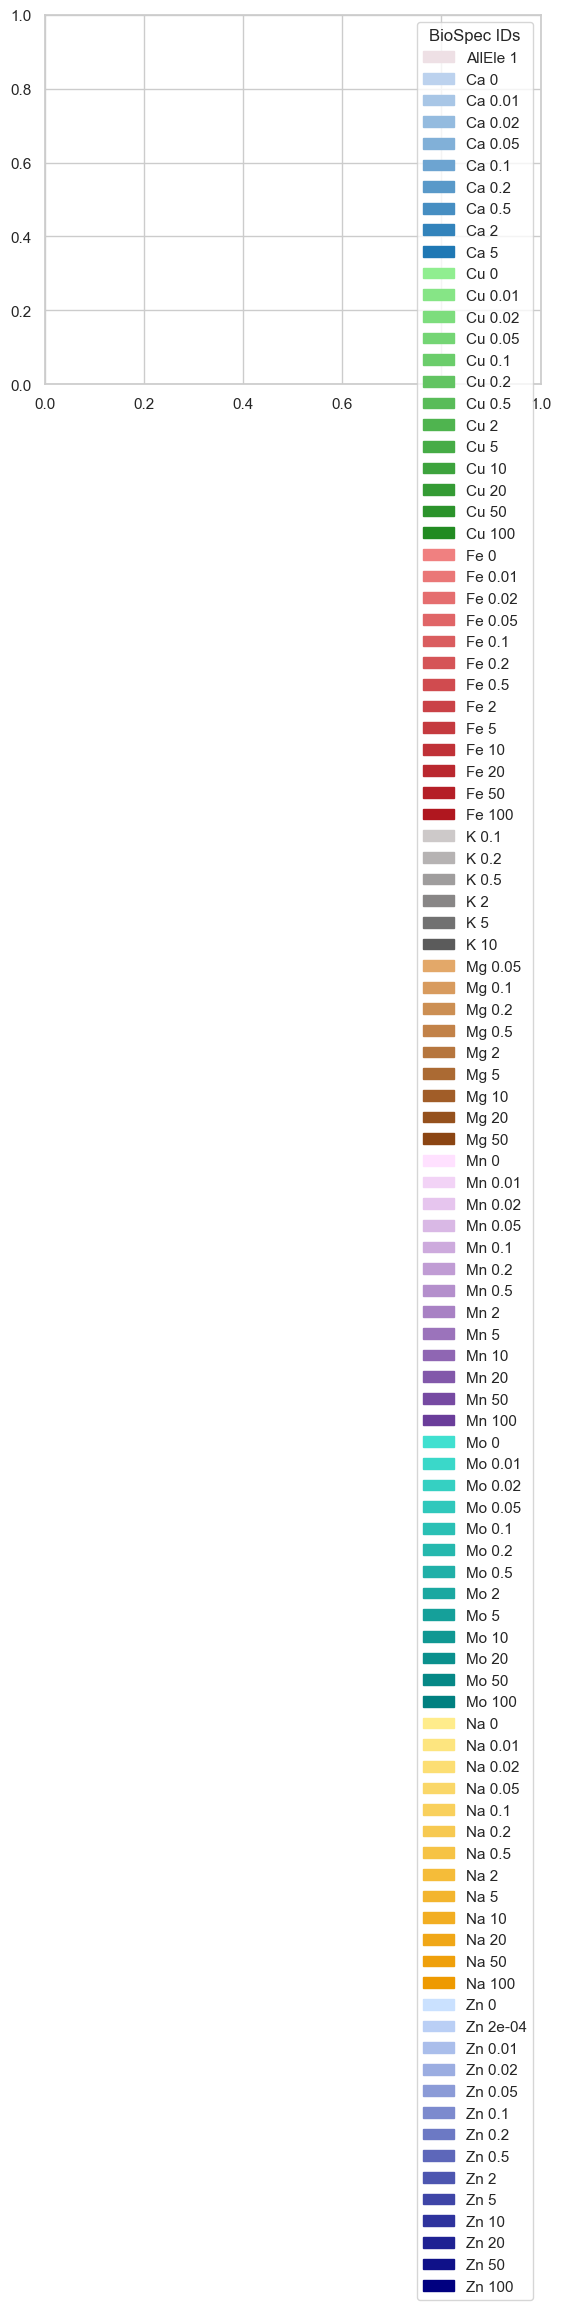

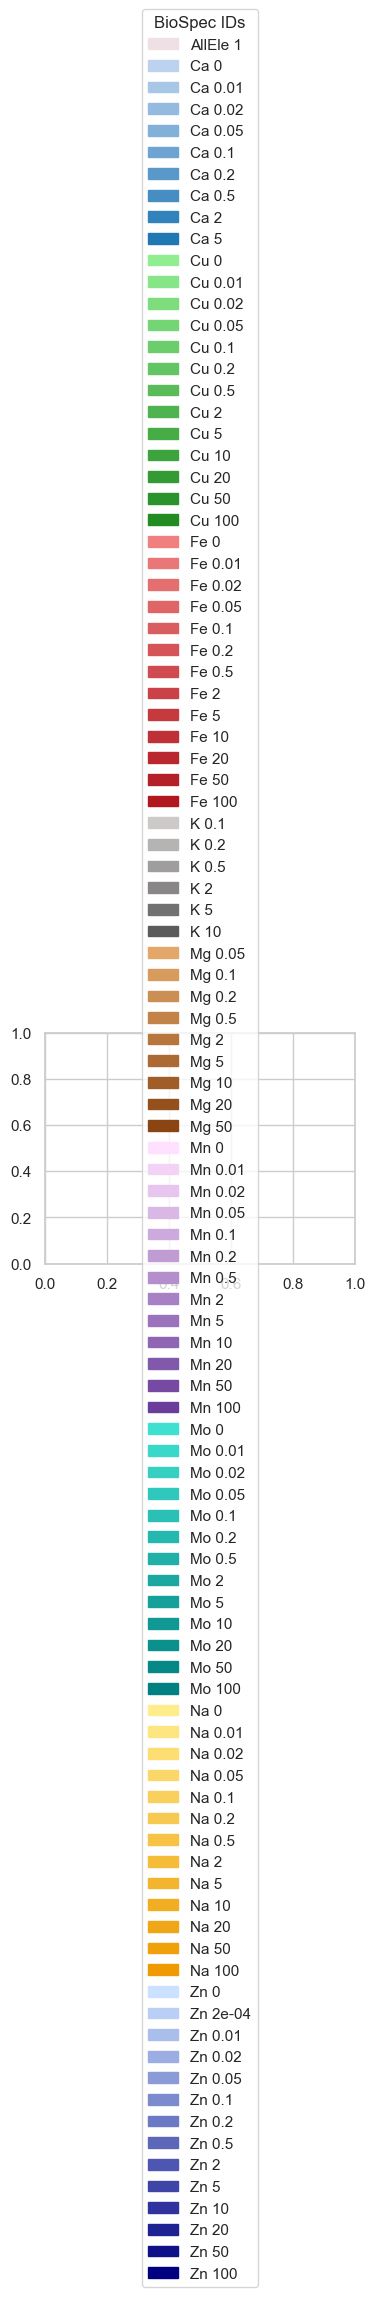

In [12]:
import matplotlib.patches as mpatches

# Create a legend for the BioSpec IDs
legend_labels = list(colkey_BioSpecID.keys())
legend_colors = [colkey_BioSpecID[key] for key in legend_labels]

legend_patches = [mpatches.Patch(color=color, label=label) for color, label in zip(legend_colors, legend_labels)]

plt.legend(handles=legend_patches, loc='upper right', title='BioSpec IDs')

# Save the legend to a separate file
legend_fig = plt.figure(figsize=(4, 3))
plt.legend(handles=legend_patches, loc='center', title='BioSpec IDs')
legend_fig.savefig('/Users/aulakhs/Documents/RalserLab/metallica/experiment_data/metpert_WTmetallomics/output/plots/intracellular_metallomics/legend.pdf')


In [13]:
pivot_table

element_measured,Ca,Fe,K,Mg,Mn,Zn
BioSpecID,,,,,,
Ca 0,64.633658,80.311827,41252.162699,8980.976107,27.091712,414.409937
Ca 0.01,161.393685,70.830131,45687.372846,9154.366435,20.721305,369.800217
Ca 0.02,217.756071,69.013373,47217.248095,9167.377545,19.392089,353.613582
Ca 0.05,314.811614,69.922061,49422.269671,9270.594288,18.160714,348.535072
Ca 0.1,416.505504,76.053531,50293.826505,9411.443472,17.097415,331.233202
...,...,...,...,...,...,...
Zn 0.5,1038.770467,64.689246,55192.336615,9336.445996,13.895969,179.888664
Zn 10,971.374183,73.667694,52879.226320,9667.295347,11.853253,955.864530
Zn 2,905.335413,89.473638,52935.982252,9807.499996,11.872289,568.850113


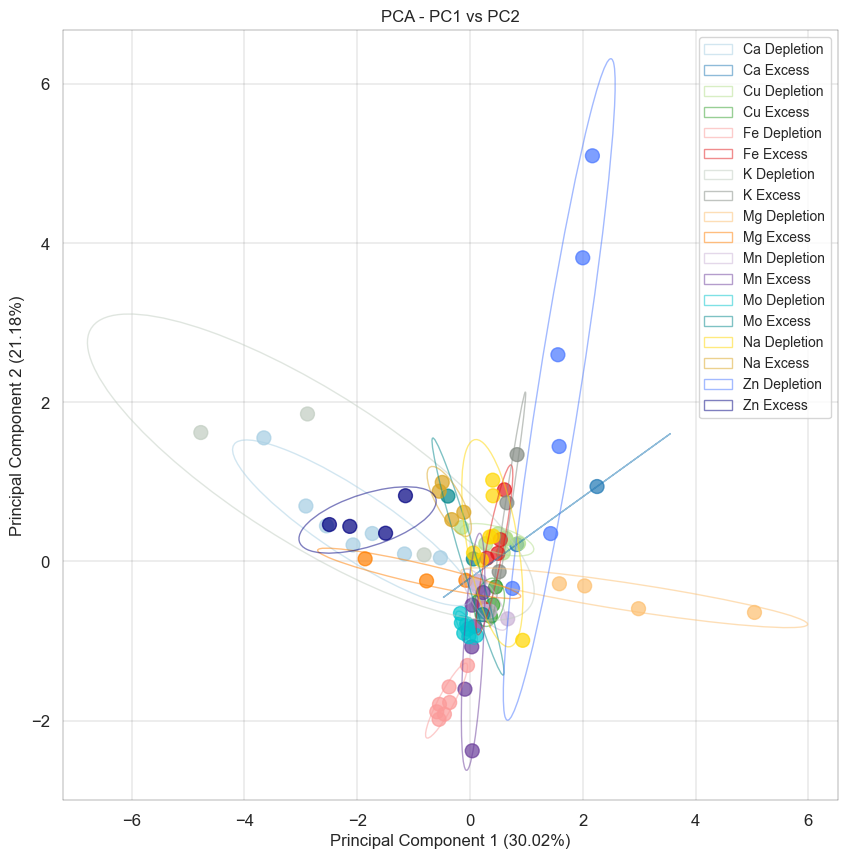

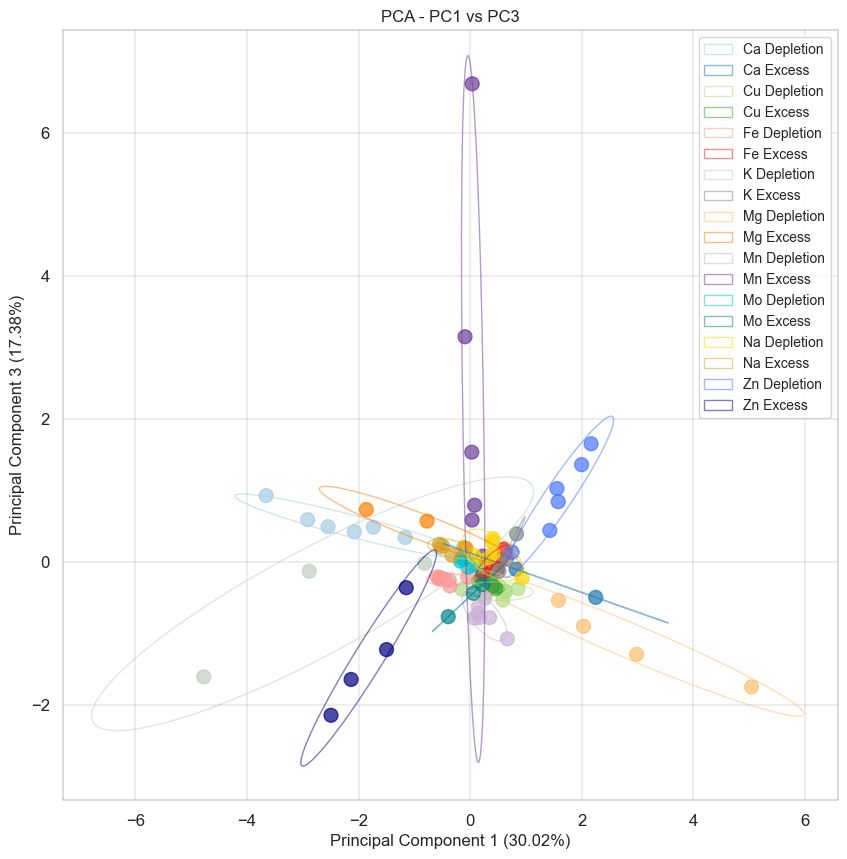

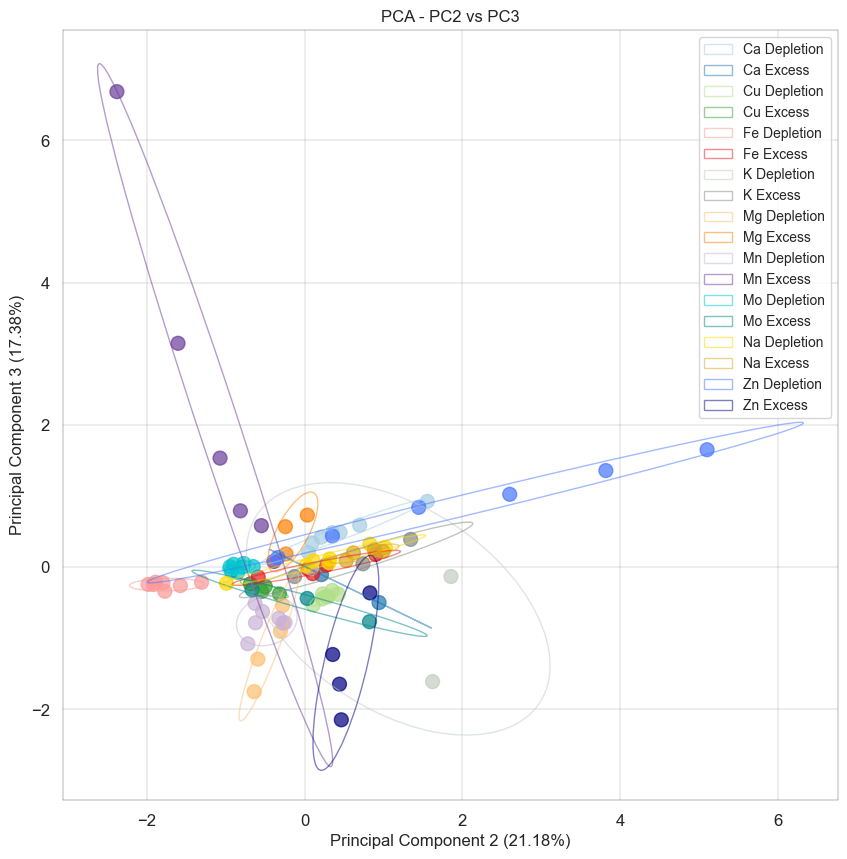

In [14]:

# Function to determine the perturbation type
def get_perturbation(biospecid):
    metal, value = biospecid.split()
    value = float(value)
    perturbation = 'Excess' if value > 1 else 'Depletion'
    return f"{metal} {perturbation}"

# Add a new column for perturbation
pivot_table['Perturbation'] = pivot_table.index.map(get_perturbation)
# Create a scatter plot with colors based on Perturbation
unique_perturbations = pivot_table['Perturbation'].unique()
color_map = colkey_metpert
perturbation_colors = pivot_table['Perturbation'].map(color_map)
def plot_pca_scatter(pc_x, pc_y, explained_variance_ratio, pca_result, perturbation_colors, title, file_name):
    plt.figure(figsize=(10, 10))
    plt.scatter(pca_result[:, pc_x], pca_result[:, pc_y], c=perturbation_colors, s=100, alpha=0.7)
    
    plt.xlabel(f'Principal Component {pc_x + 1} ({round(explained_variance_ratio[pc_x] * 100, 2)}%)')
    plt.ylabel(f'Principal Component {pc_y + 1} ({round(explained_variance_ratio[pc_y] * 100, 2)}%)')
    
    # Function to draw ellipses
    def draw_ellipse(mean, cov, ax, n_std=2.0, facecolor='none', **kwargs):
        pearson = cov[0, 1] / np.sqrt(cov[0, 0] * cov[1, 1])
        ell_radius_x = np.sqrt(1 + pearson)
        ell_radius_y = np.sqrt(1 - pearson)
        ellipse = patches.Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2, facecolor=facecolor, **kwargs)
        
        scale_x = np.sqrt(cov[0, 0]) * n_std
        scale_y = np.sqrt(cov[1, 1]) * n_std
        transf = (transforms.Affine2D()
                  .rotate_deg(45)
                  .scale(scale_x, scale_y)
                  .translate(mean[0], mean[1]))

        ellipse.set_transform(transf + ax.transData)
        return ax.add_patch(ellipse)

    # Plot ellipses for each perturbation
    for perturbation in unique_perturbations:
        perturbation_data = pca_result[pivot_table['Perturbation'] == perturbation][:, [pc_x, pc_y]]
        mean = perturbation_data.mean(axis=0)
        cov = np.cov(perturbation_data, rowvar=False)
        draw_ellipse(mean, cov, plt.gca(), edgecolor=color_map[perturbation], alpha=0.5, label=perturbation)

    # Add legend
    plt.legend(loc='best', fontsize=10)

    # Customize the axis ticks
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Increase the linewidth of grid lines
    plt.grid(color="black", linewidth=0.1)

    # Customize the outer square
    plt.gca().spines['top'].set_linewidth(0.2)
    plt.gca().spines['right'].set_linewidth(0.2)
    plt.gca().spines['bottom'].set_linewidth(0.2)
    plt.gca().spines['left'].set_linewidth(0.2)
    for spine in plt.gca().spines.values():
        spine.set_edgecolor('black')

    plt.title(title)
    plt.savefig(file_name)
    plt.show()

# Plot PC1 vs PC2
plot_pca_scatter(0, 1, explained_variance_ratio, pca_result, perturbation_colors,
                 'PCA - PC1 vs PC2', '/Users/aulakhs/Documents/RalserLab/metallica/experiment_data/metpert_WTmetallomics/output/plots/intracellular_metallomics/PCA_metpertellipses_PC1_vs_PC2.pdf')

# Plot PC1 vs PC3
plot_pca_scatter(0, 2, explained_variance_ratio, pca_result, perturbation_colors,
                 'PCA - PC1 vs PC3', '/Users/aulakhs/Documents/RalserLab/metallica/experiment_data/metpert_WTmetallomics/output/plots/intracellular_metallomics/PCA_metpertellipses_PC1_vs_PC3.pdf')

# Plot PC2 vs PC3
plot_pca_scatter(1, 2, explained_variance_ratio, pca_result, perturbation_colors,
                 'PCA - PC2 vs PC3', '/Users/aulakhs/Documents/RalserLab/metallica/experiment_data/metpert_WTmetallomics/output/plots/intracellular_metallomics/PCA_metpertellipses_PC2_vs_PC3.pdf')

plt.show()

## Calculate metallome similarity metrics

In [15]:
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity, manhattan_distances
from scipy.spatial import distance, distance_matrix
from scipy.linalg import inv

In [16]:
## prepare data for correlation and distance metric calculation -- based on fold change vs control

# Select the relevant columns
selected_df = all_metallomics_df[['element_measured', 'BioSpecID', 'Ratio_to_AEngperwell']]

# Group by BioSpecID and element_measured, and calculate the mean
grouped_df = selected_df.groupby(['BioSpecID', 'element_measured']).mean().reset_index()

# Pivot the DataFrame to have BioSpecID as rows, element_measured as columns, and Ratio_to_AEngperwell as values
pivot_table = grouped_df.pivot(index='BioSpecID', columns='element_measured', values='Ratio_to_AEngperwell')

# Print the number of rows and columns in the final pivot table
num_rows = pivot_table.shape[0]
num_columns = pivot_table.shape[1]

# Count NAs in each column and row
na_count_col = pivot_table.isna().sum()
na_count_row = pivot_table.isna().sum(axis=1)

# Calculate the threshold for filtering (10% of total columns or rows)
threshold_col = 0.1 * len(pivot_table.columns)
threshold_row = 0.1 * len(pivot_table)

# Filter out columns and rows with more than 10% NAs
pivot_table = pivot_table.loc[:, na_count_col <= threshold_col]
pivot_table = pivot_table.loc[na_count_row <= threshold_row]

# Fill in remaining NAs with a value (e.g., 1)
pivot_table = pivot_table.fillna(1)

# Print the number of rows and columns in the final pivot table
num_rows = pivot_table.shape[0]
num_columns = pivot_table.shape[1]


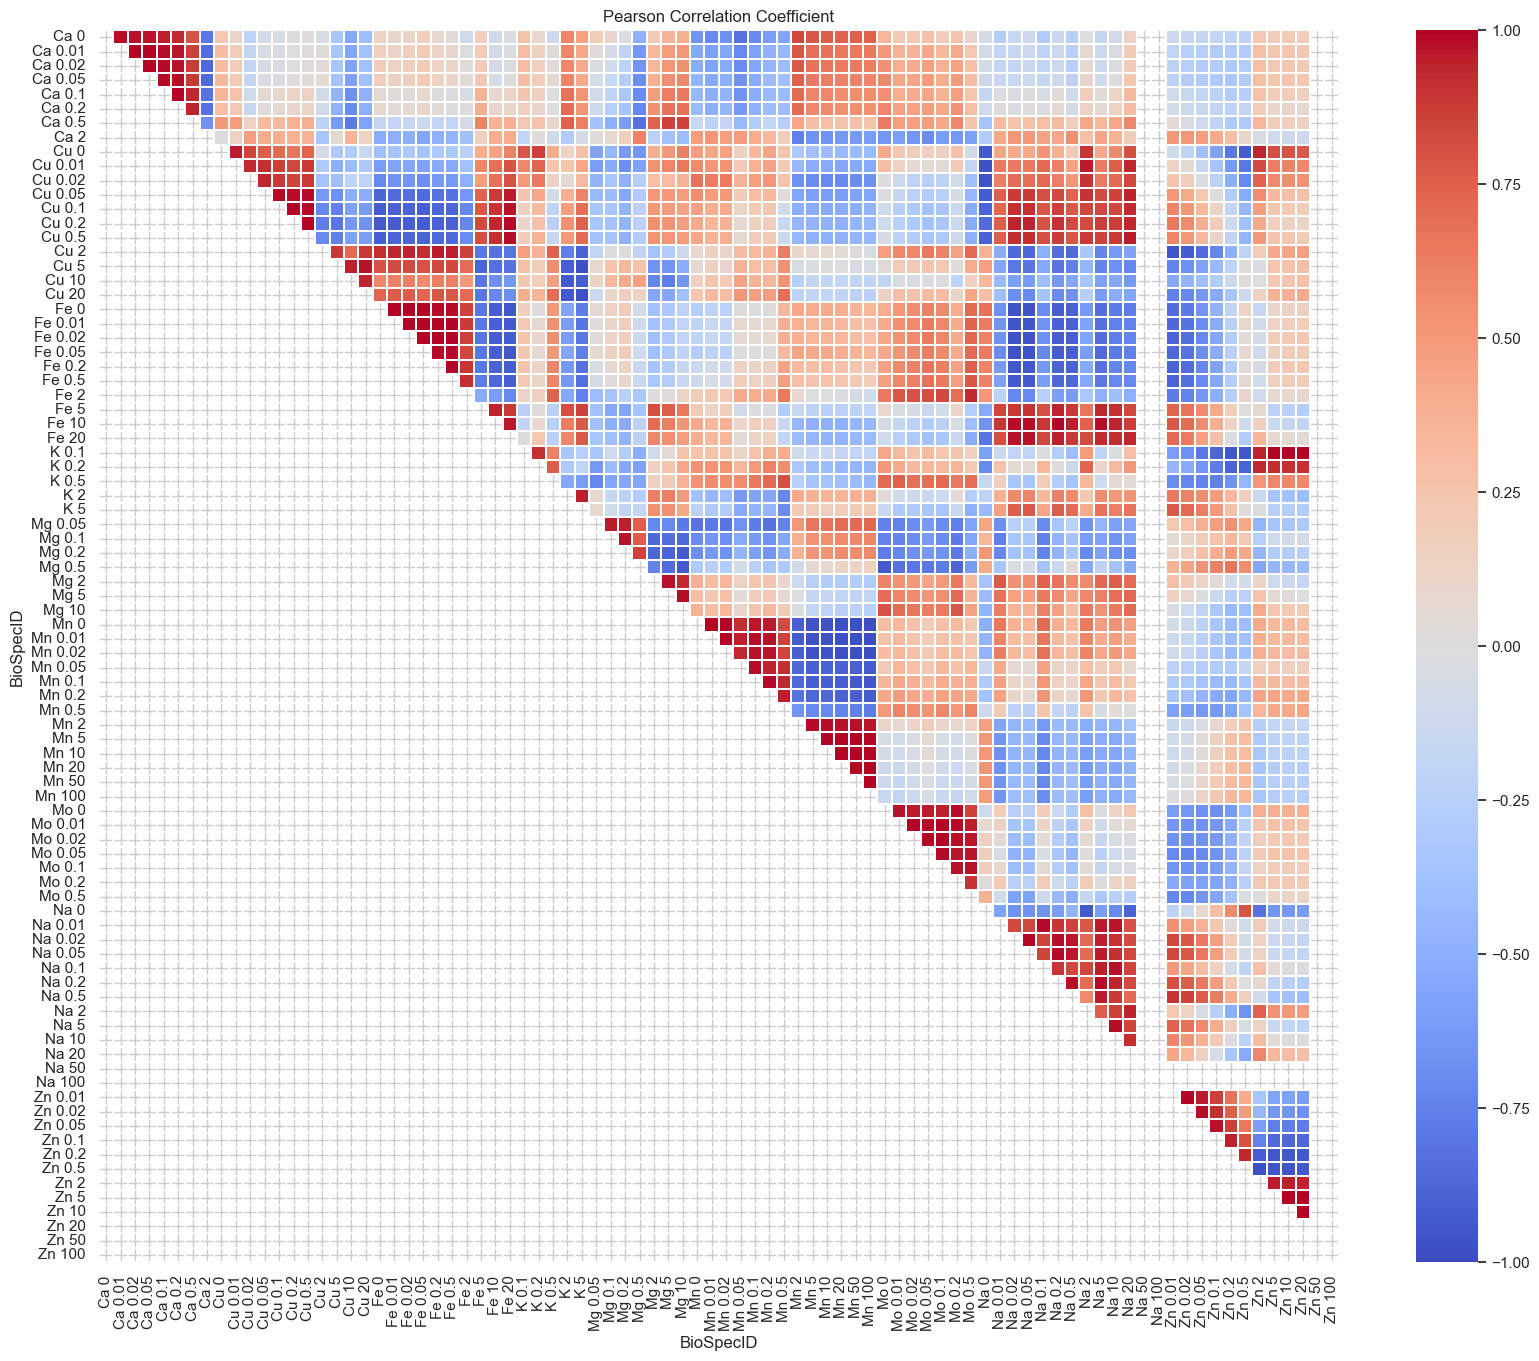

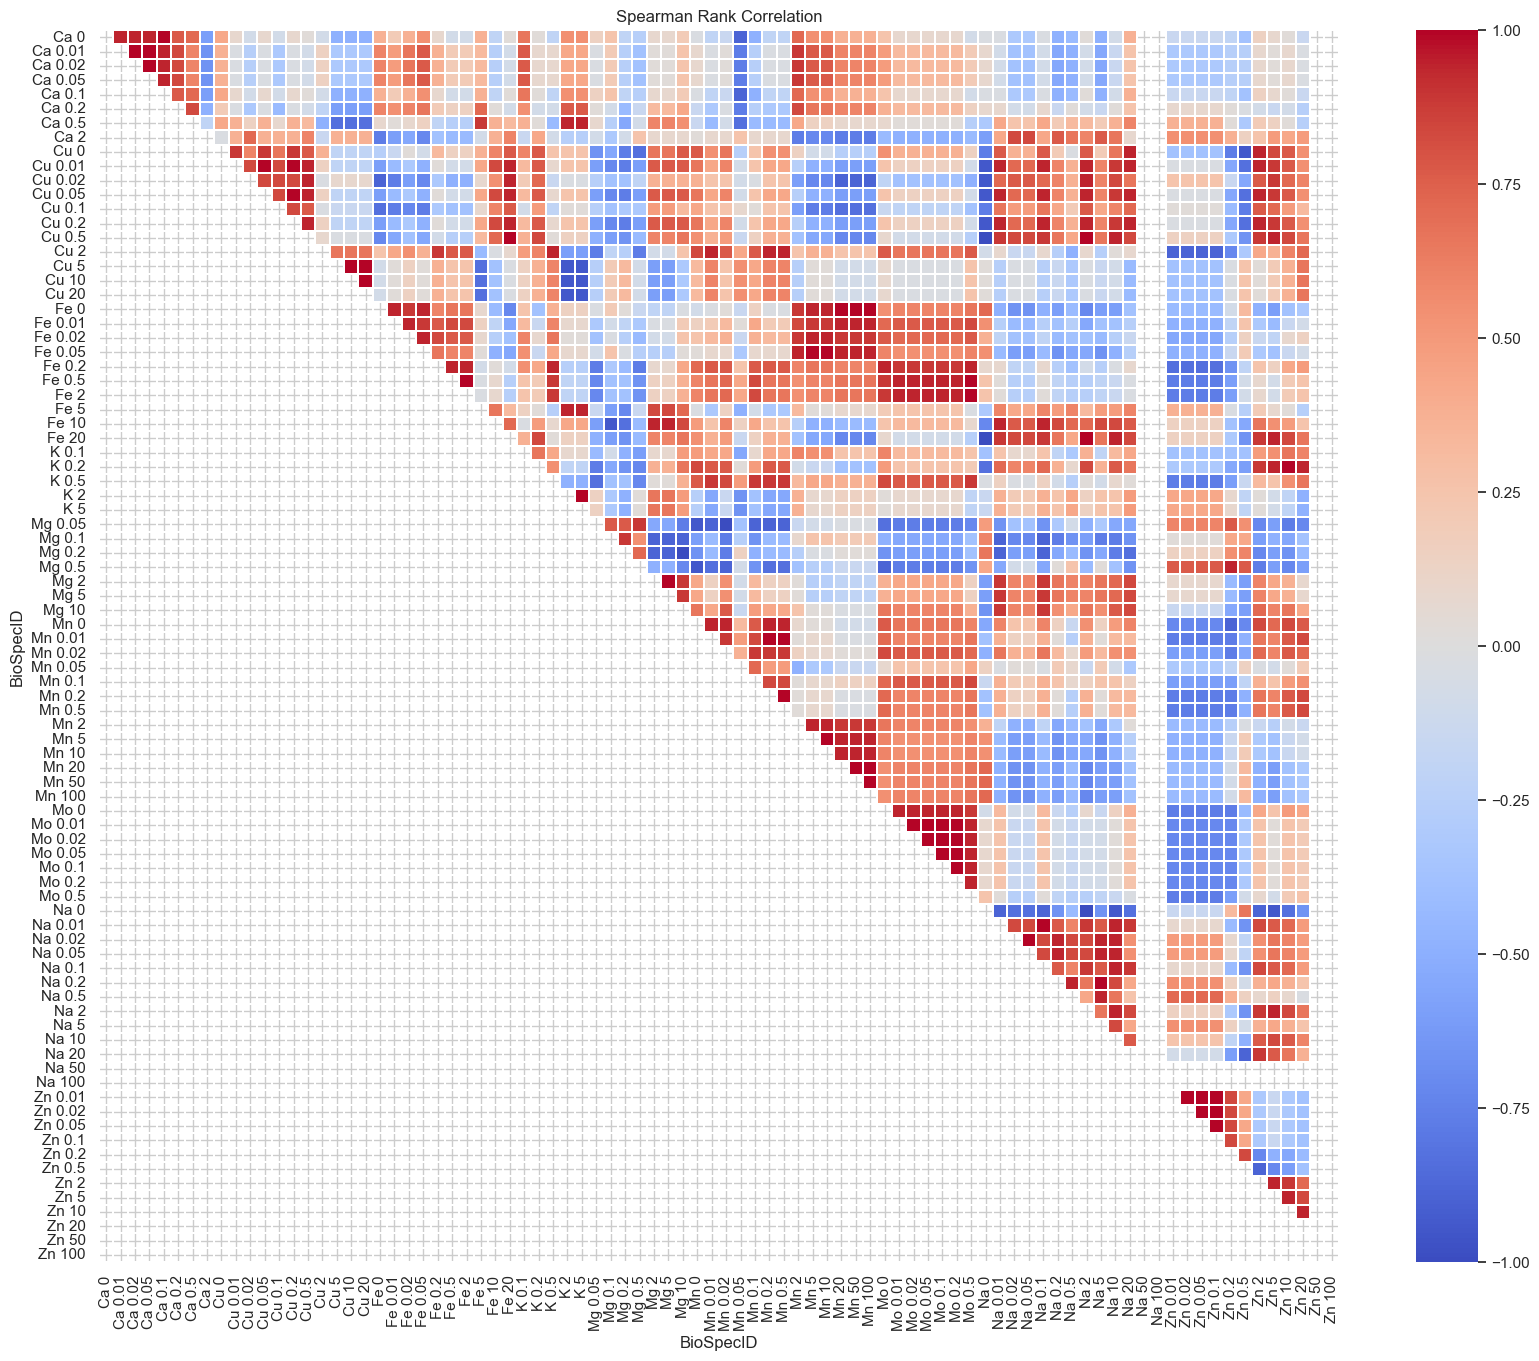

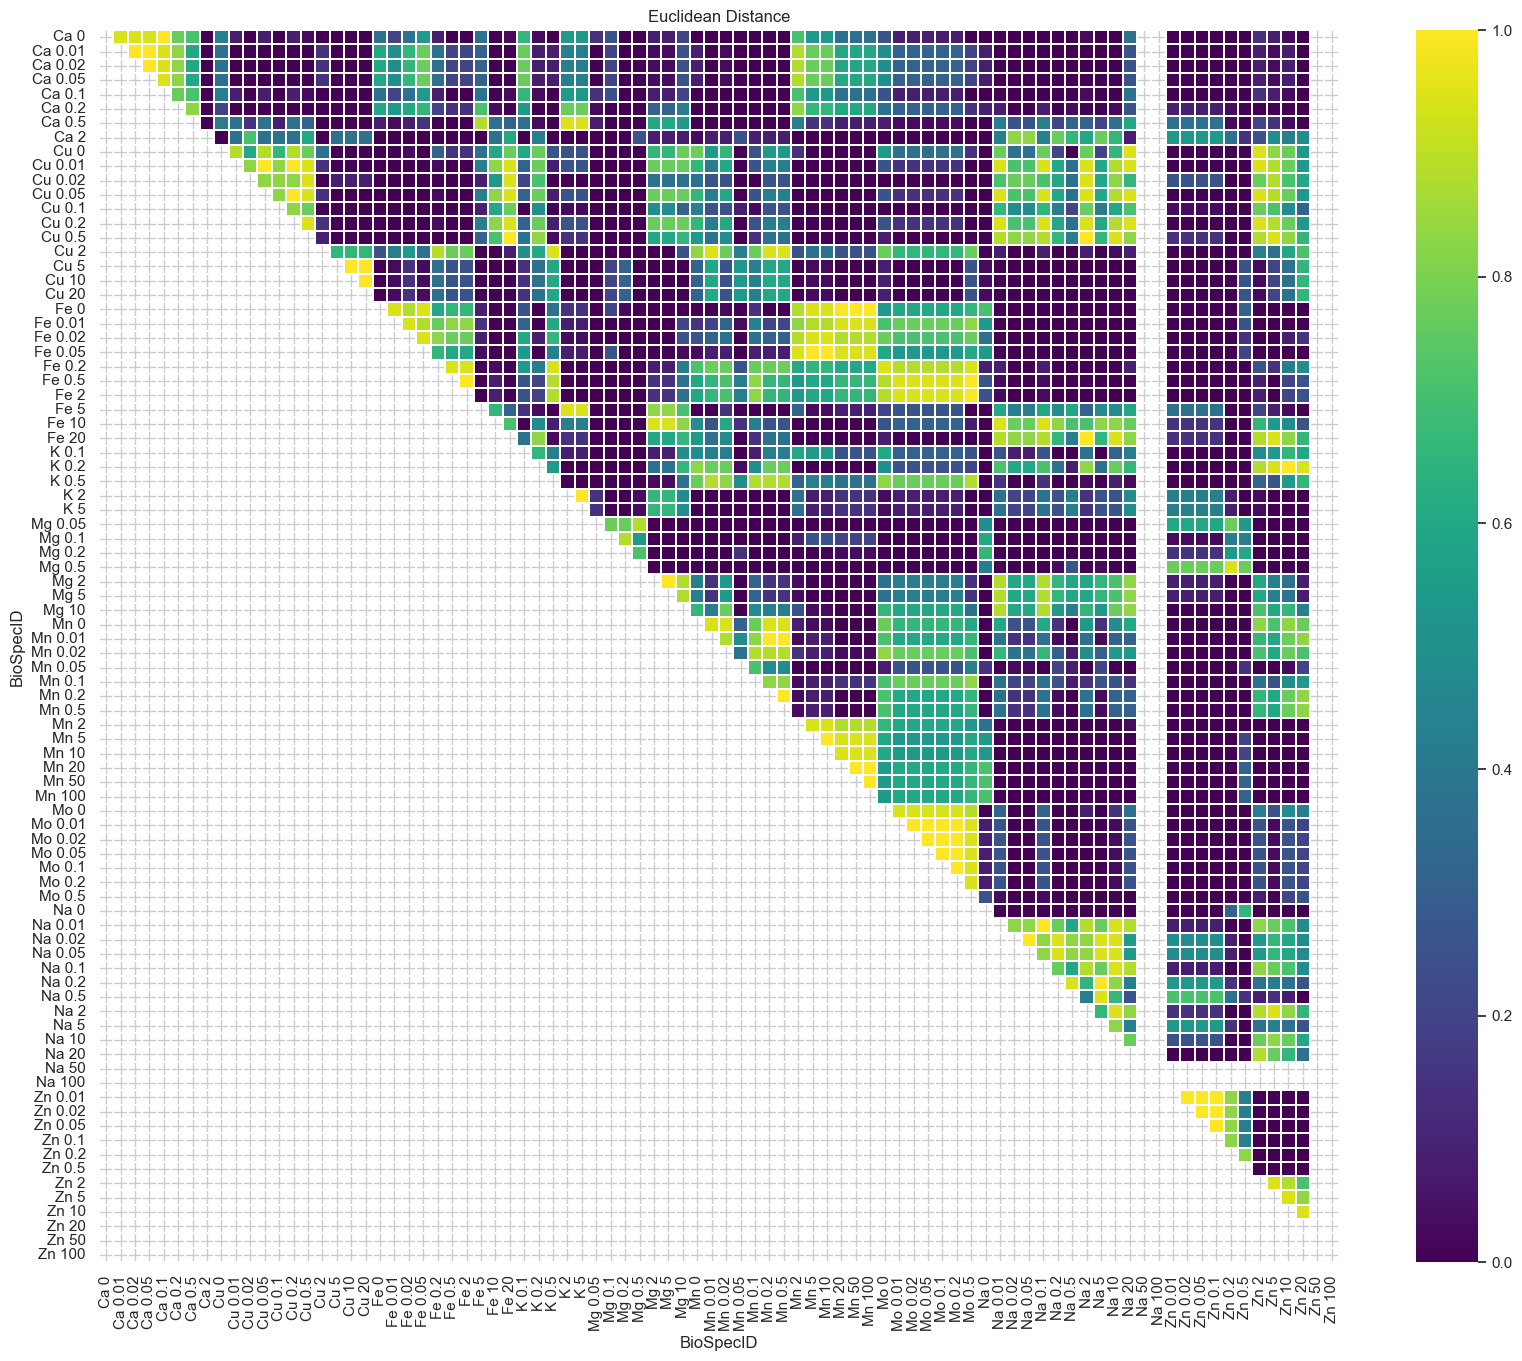

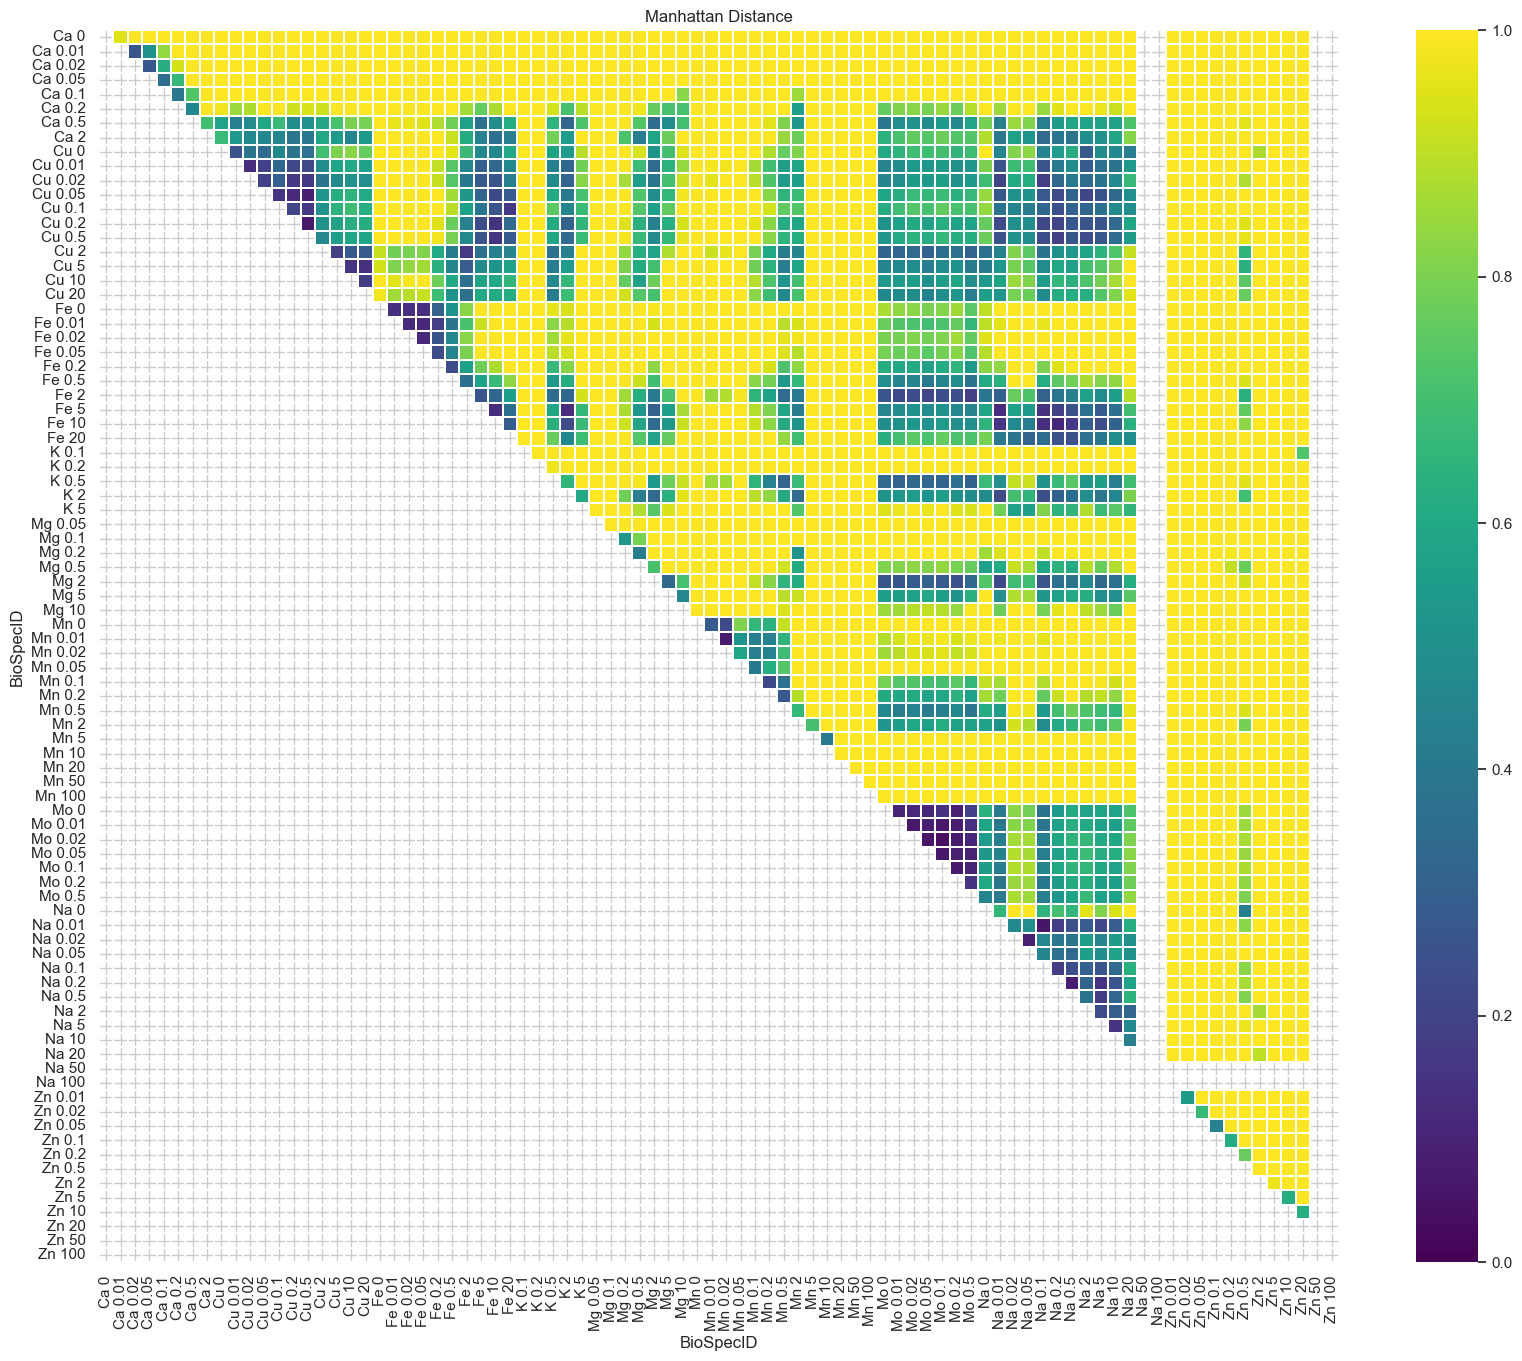

In [17]:

# Calculate correlations and distance metrics

metallome_pearson_corr = pivot_table.T.corr(method='pearson')
metallome_spearman_corr = pivot_table.T.corr(method='spearman')
metallome_euclidean_dist = euclidean_distances(pivot_table)
metallome_manhattan_dist = manhattan_distances(pivot_table)

# Convert correlation matrices to dataframes
metallome_pearson_corr_df = pd.DataFrame(metallome_pearson_corr, index=pivot_table.index, columns=pivot_table.index)
metallome_spearman_corr_df = pd.DataFrame(metallome_spearman_corr, index=pivot_table.index, columns=pivot_table.index)
metallome_euclidean_dist_df = pd.DataFrame(metallome_spearman_corr, index=pivot_table.index, columns=pivot_table.index)
metallome_manhattan_dist_df = pd.DataFrame(metallome_manhattan_dist, index=pivot_table.index, columns=pivot_table.index)

# Define file paths for saving figures
figure_names = [
    'BioSpecID_metal_pearson_correlation_heatmap.pdf',
    'BioSpecID_metal_spearman_correlation_heatmap.pdf',
    'BioSpecID_metal_euclidean_distance_heatmap.pdf',
    'BioSpecID_metal_manhattan_distance_heatmap.pdf'
]

# Define figure dataframes
metallome_heatmap_dataframes = [metallome_pearson_corr_df, metallome_spearman_corr_df,
                                metallome_euclidean_dist_df, metallome_manhattan_dist_df]

# Loop through the dataframes and figure names
for df, figure_name in zip(metallome_heatmap_dataframes, figure_names):
    # Reindex the dataframe based on metal_order
    df = df.reindex(index=common_metal_order, columns=common_metal_order)
    
    # Create the heatmap
    plt.figure(figsize=(20, 16))
    sns.heatmap(df, cmap='coolwarm' if 'correlation' in figure_name else 'viridis',
                vmin=-1 if 'correlation' in figure_name else 0, vmax=1 if 'correlation' in figure_name else 1,
                linewidths=0.1, annot=False, xticklabels=df.columns, yticklabels=df.index,
                mask=np.tril(np.ones(df.shape)))
    
    # Set the title based on the figure name
    if 'pearson' in figure_name:
        plt.title('Pearson Correlation Coefficient')
    elif 'spearman' in figure_name:
        plt.title('Spearman Rank Correlation')
    elif 'euclidean' in figure_name:
        plt.title('Euclidean Distance')
    elif 'manhattan' in figure_name:
        plt.title('Manhattan Distance')
    
    # Save the heatmap as a PDF
    plt.savefig(os.path.join(output_dir, figure_name), format='pdf')
    plt.show()


In [18]:
## write correlation results 
output_dir = '/Users/aulakhs/Documents/RalserLab/metallica/experiment_data/metpert_WTmetallomics/output/tables'

# Define filenames for the dataframes
filenames = [
    'metallome_pearson_corr.csv',
    'metallome_spearman_corr.csv',
    'metallome_euclidean_dist.csv',
    'metallome_manhattan_dist.csv'
]

# Write each dataframe to disk
for df, filename in zip(metallome_heatmap_dataframes, filenames):
    df.to_csv(os.path.join(output_dir, filename))
